In [102]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve

sns.set(style = 'darkgrid')

In [103]:
df = pd.read_csv('Social_Network_Ads.csv')
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<AxesSubplot:>

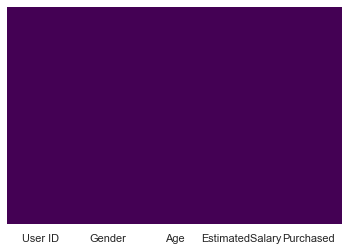

In [104]:
sns.heatmap(df.isnull(),yticklabels = False , cbar = False , cmap = 'viridis')

In [105]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [106]:
df.duplicated().sum()

0

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [108]:
# drop user id(no use) cz its Useless

df.drop('User ID', axis = 1, inplace=True)

In [109]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<AxesSubplot:>

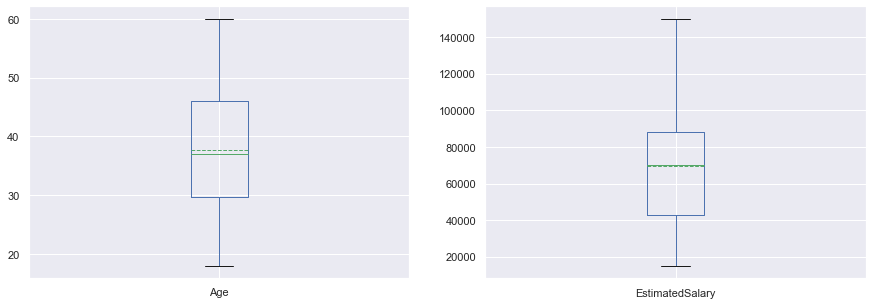

In [110]:
# Checking outliers

fig, ax = plt.subplots(1,2, figsize = (15, 5))
df['Age'].plot.box(ax = ax[0], showmeans = True, meanline = True)
df['EstimatedSalary'].plot.box(ax = ax[1], showmeans = True, meanline = True)

#sns.boxplot(df['EstimatedSalary'], ax = ax[1])

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Purchased'}>, <AxesSubplot:>]],
      dtype=object)

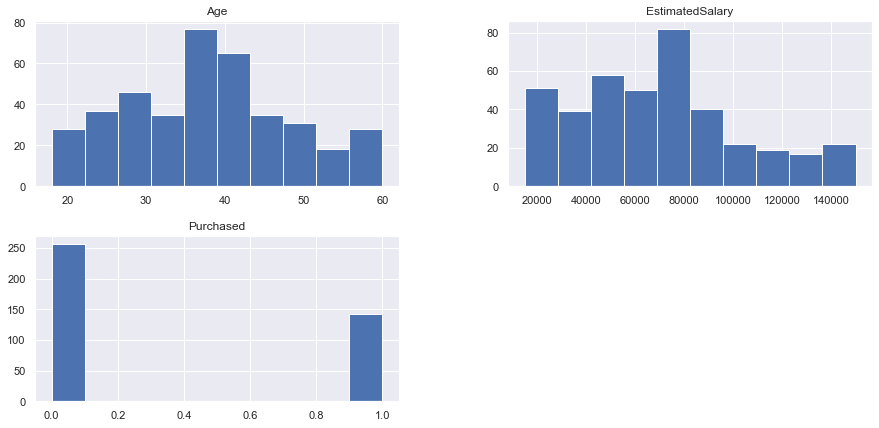

In [111]:
df.hist(figsize = (15, 7))

In [112]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

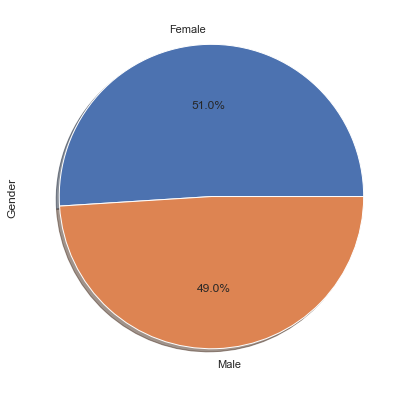

In [113]:
# pie plot
df['Gender'].value_counts().plot.pie(autopct='%2.1f%%', shadow= True, figsize = (7, 7))


<AxesSubplot:xlabel='Purchased', ylabel='count'>

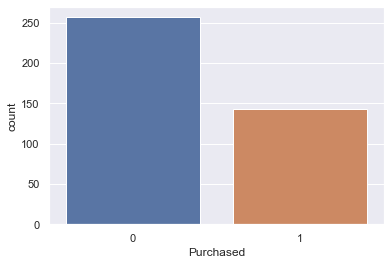

In [114]:
sns.countplot('Purchased', data = df)

<AxesSubplot:ylabel='Purchased'>

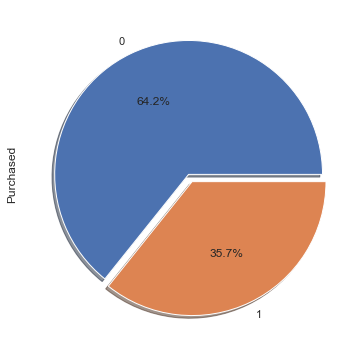

In [115]:
df['Purchased'].value_counts().plot.pie(autopct = '%1.1f%%', shadow= True, figsize = (6, 8), explode = [0, 0.06])

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

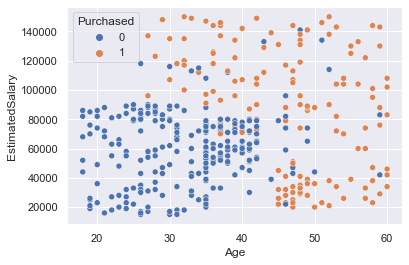

In [116]:
# Bivariate analysis
# Bivariate analysis can be helpful in testing simple hypotheses of association.

sns.scatterplot('Age', 'EstimatedSalary', data = df, hue = 'Purchased')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

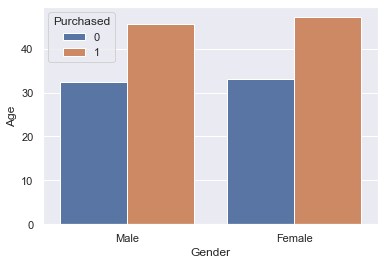

In [117]:
sns.barplot('Gender', 'Age',data = df, hue = 'Purchased', ci = False)

In [118]:
# There is no use of Gender feature because there is no(less) efferct of Gender on Purchased

df.drop('Gender', inplace=True, axis = 1)

<AxesSubplot:>

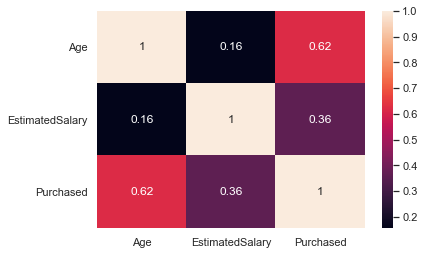

In [119]:
sns.heatmap(df.corr(), annot=True)

In [120]:
X = df.drop('Purchased', axis = 1)
y = df['Purchased']

In [121]:
X.shape, y.shape

((400, 2), (400,))

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [123]:
# Normalizing the data

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# LogisticRegression

In [124]:
model_list = []
score_list = []

model1 = LogisticRegression()
model1.fit(X_train, y_train)
score1 = accuracy_score(y_test, model1.predict(X_test))
print("Model : Logistics Regression")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score1))

model_list.append('Logistic_Regression')

score_list.append(score1)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model1.predict(X_test))))

print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model1.predict(X_test))))

Model : Logistics Regression
Accuracy : 0.86
Recall_Score : 0.68
precission_Score : 0.90


# RandomForest

In [125]:
model2 = RandomForestClassifier(random_state=5)
model2.fit(X_train, y_train)
score2 = accuracy_score(y_test, model2.predict(X_test))
print("Model : RandomForest Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score2))

model_list.append('RandomForestClassifier')
score_list.append(score2)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model2.predict(X_test))))

print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model2.predict(X_test))))

Model : RandomForest Classifier
Accuracy : 0.89
Recall_Score : 0.89
precission_Score : 0.81


# GradientBoosting

In [127]:
model3 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01)
model3.fit(X_train, y_train)
score3 = accuracy_score(y_test, model3.predict(X_test))
print("Model : GradientBoosting Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score3))
model_list.append('GradientBoostingClassifier')
score_list.append(score3)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model3.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model3.predict(X_test))))


Model : GradientBoosting Classifier
Accuracy : 0.91
Recall_Score : 0.93
precission_Score : 0.84


# SVC

In [128]:
model5 = SVC(kernel = 'rbf',  random_state = 2)
model5.fit(X_train, y_train)
score5 = accuracy_score(y_test, model5.predict(X_test))
print("Model : Support vector Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score5))
model_list.append('Support vectorClassifier')
score_list.append(score5)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model5.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model5.predict(X_test))))

Model : Support vector Classifier
Accuracy : 0.93
Recall_Score : 0.96
precission_Score : 0.84


# GaussianNB

In [129]:
model6 = GaussianNB()
model6.fit(X_train, y_train)
score6 = accuracy_score(y_test, model6.predict(X_test))
print("Model : GaussianNB")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score6))
model_list.append('GaussianNB')
score_list.append(score6)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model6.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model6.predict(X_test))))

Model : GaussianNB
Accuracy : 0.94
Recall_Score : 0.89
precission_Score : 0.93


# AdaBoost

In [132]:
model4 = AdaBoostClassifier()
model4.fit(X_train, y_train)
score4 = accuracy_score(y_test, model4.predict(X_test))
print("Model : AdaBoost Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score4))
model_list.append('AdaBoostClassifier')
score_list.append(score4)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model4.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model4.predict(X_test))))

Model : AdaBoost Classifier
Accuracy : 0.89
Recall_Score : 0.75
precission_Score : 0.91


<AxesSubplot:>

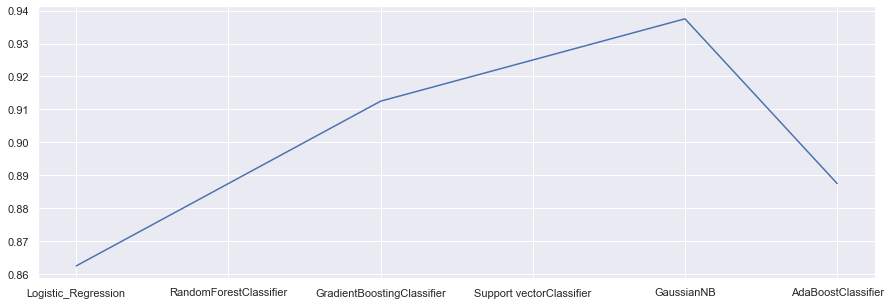

In [133]:
plt.figure(figsize=(15, 5))
sns.lineplot(model_list, score_list)

<AxesSubplot:>

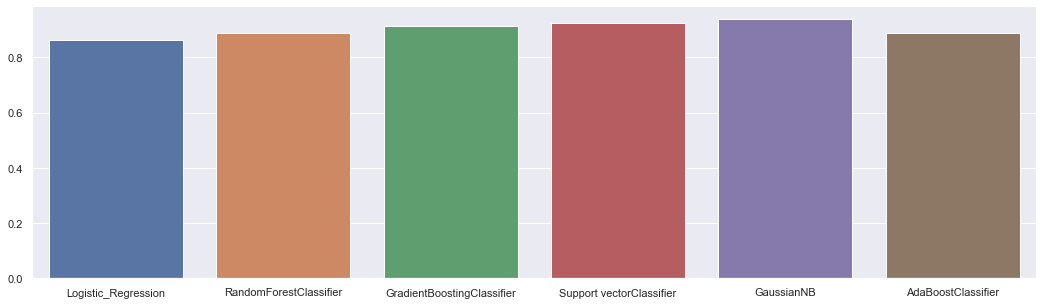

In [134]:
plt.figure(figsize=(18, 5))
sns.barplot(model_list, score_list)